In [1]:
 !pip install pandas matplotlib seaborn scikit-learn  requests 



  Using cached scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../data/historical_stock_data_SBIN.csv')
df.head(5)

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,844.90,848.05,828.60,843.75,834.45,836.30,837.22,912.0,543.2,18990090,1.589888e+10,305592,SBIN
1,2024-06-20,EQ,853.00,853.10,842.35,852.60,844.90,843.75,846.89,912.0,543.2,13985352,1.184411e+10,214049,SBIN
2,2024-06-19,EQ,846.80,860.60,841.00,844.90,854.30,852.60,850.68,912.0,543.2,32925140,2.800865e+10,394742,SBIN
3,2024-06-18,EQ,841.55,851.50,840.25,839.20,845.30,844.90,847.17,912.0,543.2,14929083,1.264751e+10,241973,SBIN
4,2024-06-14,EQ,845.00,849.90,835.10,843.90,839.20,839.20,841.90,912.0,543.2,12903496,1.086344e+10,206549,SBIN


In [6]:
df.tail()

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
855,2021-01-07,EQ,289.00,291.80,287.00,285.05,288.00,287.70,289.15,337.95,149.45,30546600,8.832502e+09,183684,SBIN
856,2021-01-06,EQ,283.00,289.15,281.40,281.75,283.90,285.05,285.76,337.95,149.45,40765708,1.164907e+10,224327,SBIN
857,2021-01-05,EQ,278.05,282.45,277.00,281.05,281.40,281.75,279.69,337.95,149.45,27393072,7.661574e+09,155149,SBIN
858,2021-01-04,EQ,281.85,283.90,277.75,279.40,281.10,281.05,281.41,337.95,149.45,31450608,8.850464e+09,171760,SBIN
859,2021-01-01,EQ,274.90,280.00,274.40,274.95,279.05,279.40,278.33,339.85,149.45,24531791,6.827968e+09,141601,SBIN


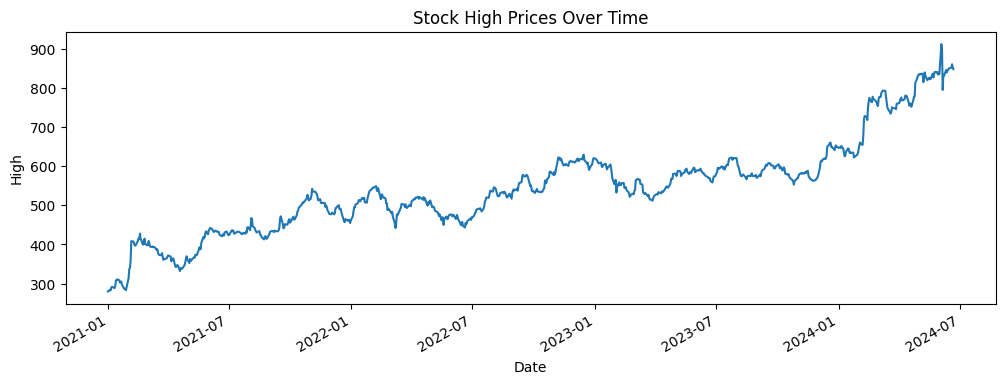

In [21]:

df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)


ax = df["HIGH"].plot(figsize=(12, 4))
ax.set_xlabel("Date")
ax.set_ylabel("High")
ax.set_title("Stock High Prices Over Time")


plt.show()

In [23]:
df.index

DatetimeIndex(['2024-06-21', '2024-06-20', '2024-06-19', '2024-06-18',
               '2024-06-14', '2024-06-13', '2024-06-12', '2024-06-11',
               '2024-06-10', '2024-06-07',
               ...
               '2021-01-14', '2021-01-13', '2021-01-12', '2021-01-11',
               '2021-01-08', '2021-01-07', '2021-01-06', '2021-01-05',
               '2021-01-04', '2021-01-01'],
              dtype='datetime64[ns]', name='DATE', length=860, freq=None)

In [29]:
df.sort_index(inplace=True)

# Now you can slice the DataFrame without encountering the KeyError
sliced_df = df.loc['2021-01-14':'2023-01-13']

# To get the index of the sliced DataFrame
sliced_index = sliced_df.index

In [39]:
share_open=sliced_df['OPEN']
share_open

DATE
2021-01-14    306.70
2021-01-15    306.80
2021-01-18    303.50
2021-01-19    297.65
2021-01-20    298.80
               ...  
2023-01-09    605.00
2023-01-10    608.45
2023-01-11    596.45
2023-01-12    597.90
2023-01-13    597.90
Name: OPEN, Length: 497, dtype: float64

In [33]:
sliced_index

DatetimeIndex(['2021-01-14', '2021-01-15', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-25',
               '2021-01-27', '2021-01-28',
               ...
               '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13'],
              dtype='datetime64[ns]', name='DATE', length=497, freq=None)

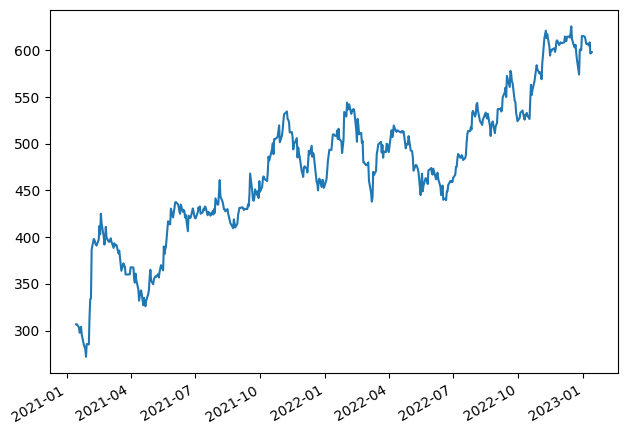

In [42]:
figure, axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(sliced_index, share_open)

In [43]:
df.reset_index()

,index,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,0,2024-06-21,EQ,844.90,848.05,828.60,843.75,834.45,836.30,837.22,912.00,543.20,18990090,1.589888e+10,305592,SBIN
1,1,2024-06-20,EQ,853.00,853.10,842.35,852.60,844.90,843.75,846.89,912.00,543.20,13985352,1.184411e+10,214049,SBIN
2,2,2024-06-19,EQ,846.80,860.60,841.00,844.90,854.30,852.60,850.68,912.00,543.20,32925140,2.800865e+10,394742,SBIN
3,3,2024-06-18,EQ,841.55,851.50,840.25,839.20,845.30,844.90,847.17,912.00,543.20,14929083,1.264751e+10,241973,SBIN
4,4,2024-06-14,EQ,845.00,849.90,835.10,843.90,839.20,839.20,841.90,912.00,543.20,12903496,1.086344e+10,206549,SBIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,855,2021-01-07,EQ,289.00,291.80,287.00,285.05,288.00,287.70,289.15,337.95,149.45,30546600,8.832502e+09,183684,SBIN
856,856,2021-01-06,EQ,283.00,289.15,281.40,281.75,283.90,285.05,285.76,337.95,149.45,40765708,1.164907e+10,224327,SBIN
857,857,2021-01-05,EQ,278.05,282.45,277.00,281.05,281.40,281.75,279.69,337.95,149.45,27393072,7.661574e+09,155149,SBIN
858,858,2021-01-04,EQ,281.85,283.90,277.75,279.40,281.10,281.05,281.41,337.95,149.45,31450608,8.850464e+09,171760,SBIN


In [45]:
df.set_index('DATE',drop=True)

,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
DATE,,,,,,,,,,,,,,
2024-06-21,EQ,844.90,848.05,828.60,843.75,834.45,836.30,837.22,912.00,543.20,18990090,1.589888e+10,305592,SBIN
2024-06-20,EQ,853.00,853.10,842.35,852.60,844.90,843.75,846.89,912.00,543.20,13985352,1.184411e+10,214049,SBIN
2024-06-19,EQ,846.80,860.60,841.00,844.90,854.30,852.60,850.68,912.00,543.20,32925140,2.800865e+10,394742,SBIN
2024-06-18,EQ,841.55,851.50,840.25,839.20,845.30,844.90,847.17,912.00,543.20,14929083,1.264751e+10,241973,SBIN
2024-06-14,EQ,845.00,849.90,835.10,843.90,839.20,839.20,841.90,912.00,543.20,12903496,1.086344e+10,206549,SBIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-07,EQ,289.00,291.80,287.00,285.05,288.00,287.70,289.15,337.95,149.45,30546600,8.832502e+09,183684,SBIN
2021-01-06,EQ,283.00,289.15,281.40,281.75,283.90,285.05,285.76,337.95,149.45,40765708,1.164907e+10,224327,SBIN
2021-01-05,EQ,278.05,282.45,277.00,281.05,281.40,281.75,279.69,337.95,149.45,27393072,7.661574e+09,155149,SBIN


In [31]:
# Save the preprocessed data to a new CSV file
scaled_df.to_csv('preprocessed_stock_data_SBIN.csv')
print("Preprocessed data saved to 'preprocessed_stock_data_SBIN.csv'")